### Problem Statememt
predicting turbine energy yield (TEY) using ambient variables as features.

Importing Libraries¶

In [95]:
#importing libraries
import pandas as pd
import numpy as npd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import keras
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

### Installing Tensor Flow

In [96]:
#!pip install tensorflow

# Importing CSV File

In [97]:
#importing Datatset
df = pd.read_csv('gas_turbines.csv')
df.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

# EDA

In [98]:
# to get stastatical data
df.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

In [99]:
# to get basic information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [100]:
df.duplicated().sum()

0

In [101]:
# to get correlation between the columns
df.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

In [102]:
# to see the number of unique values in each column
df.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

# Data Visualisation


<Axes: title={'center': 'Distplot for TEY'}, xlabel='TEY', ylabel='Density'>

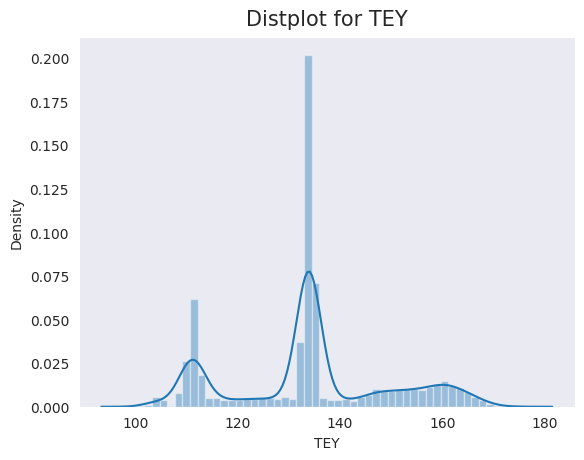

In [103]:
# Target variable
plt.title('Distplot for TEY', fontsize=15, y = 1.01)
sns.distplot(df['TEY'])

# checking the outliers

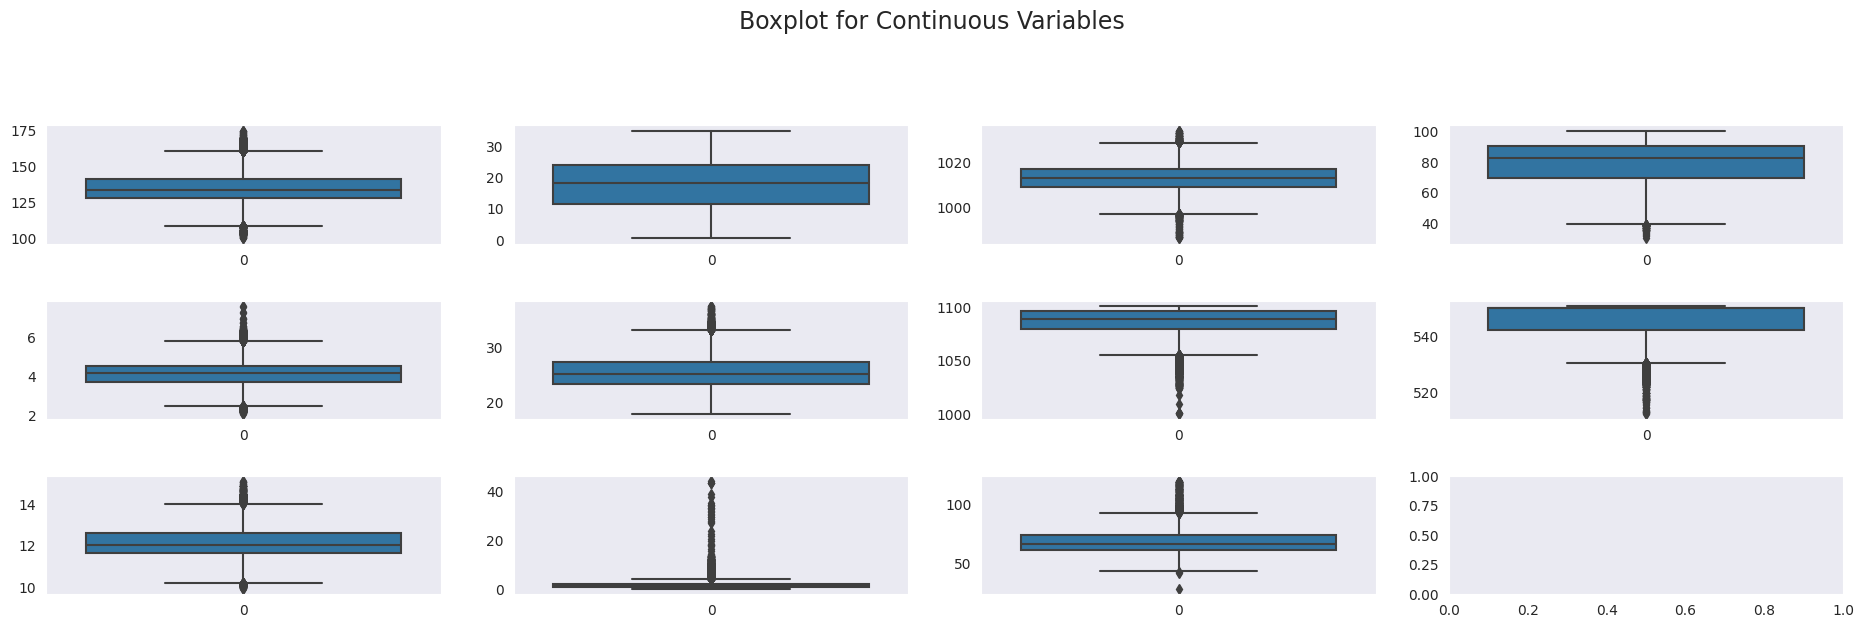

In [104]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

## Dependency of Target variable on different Features

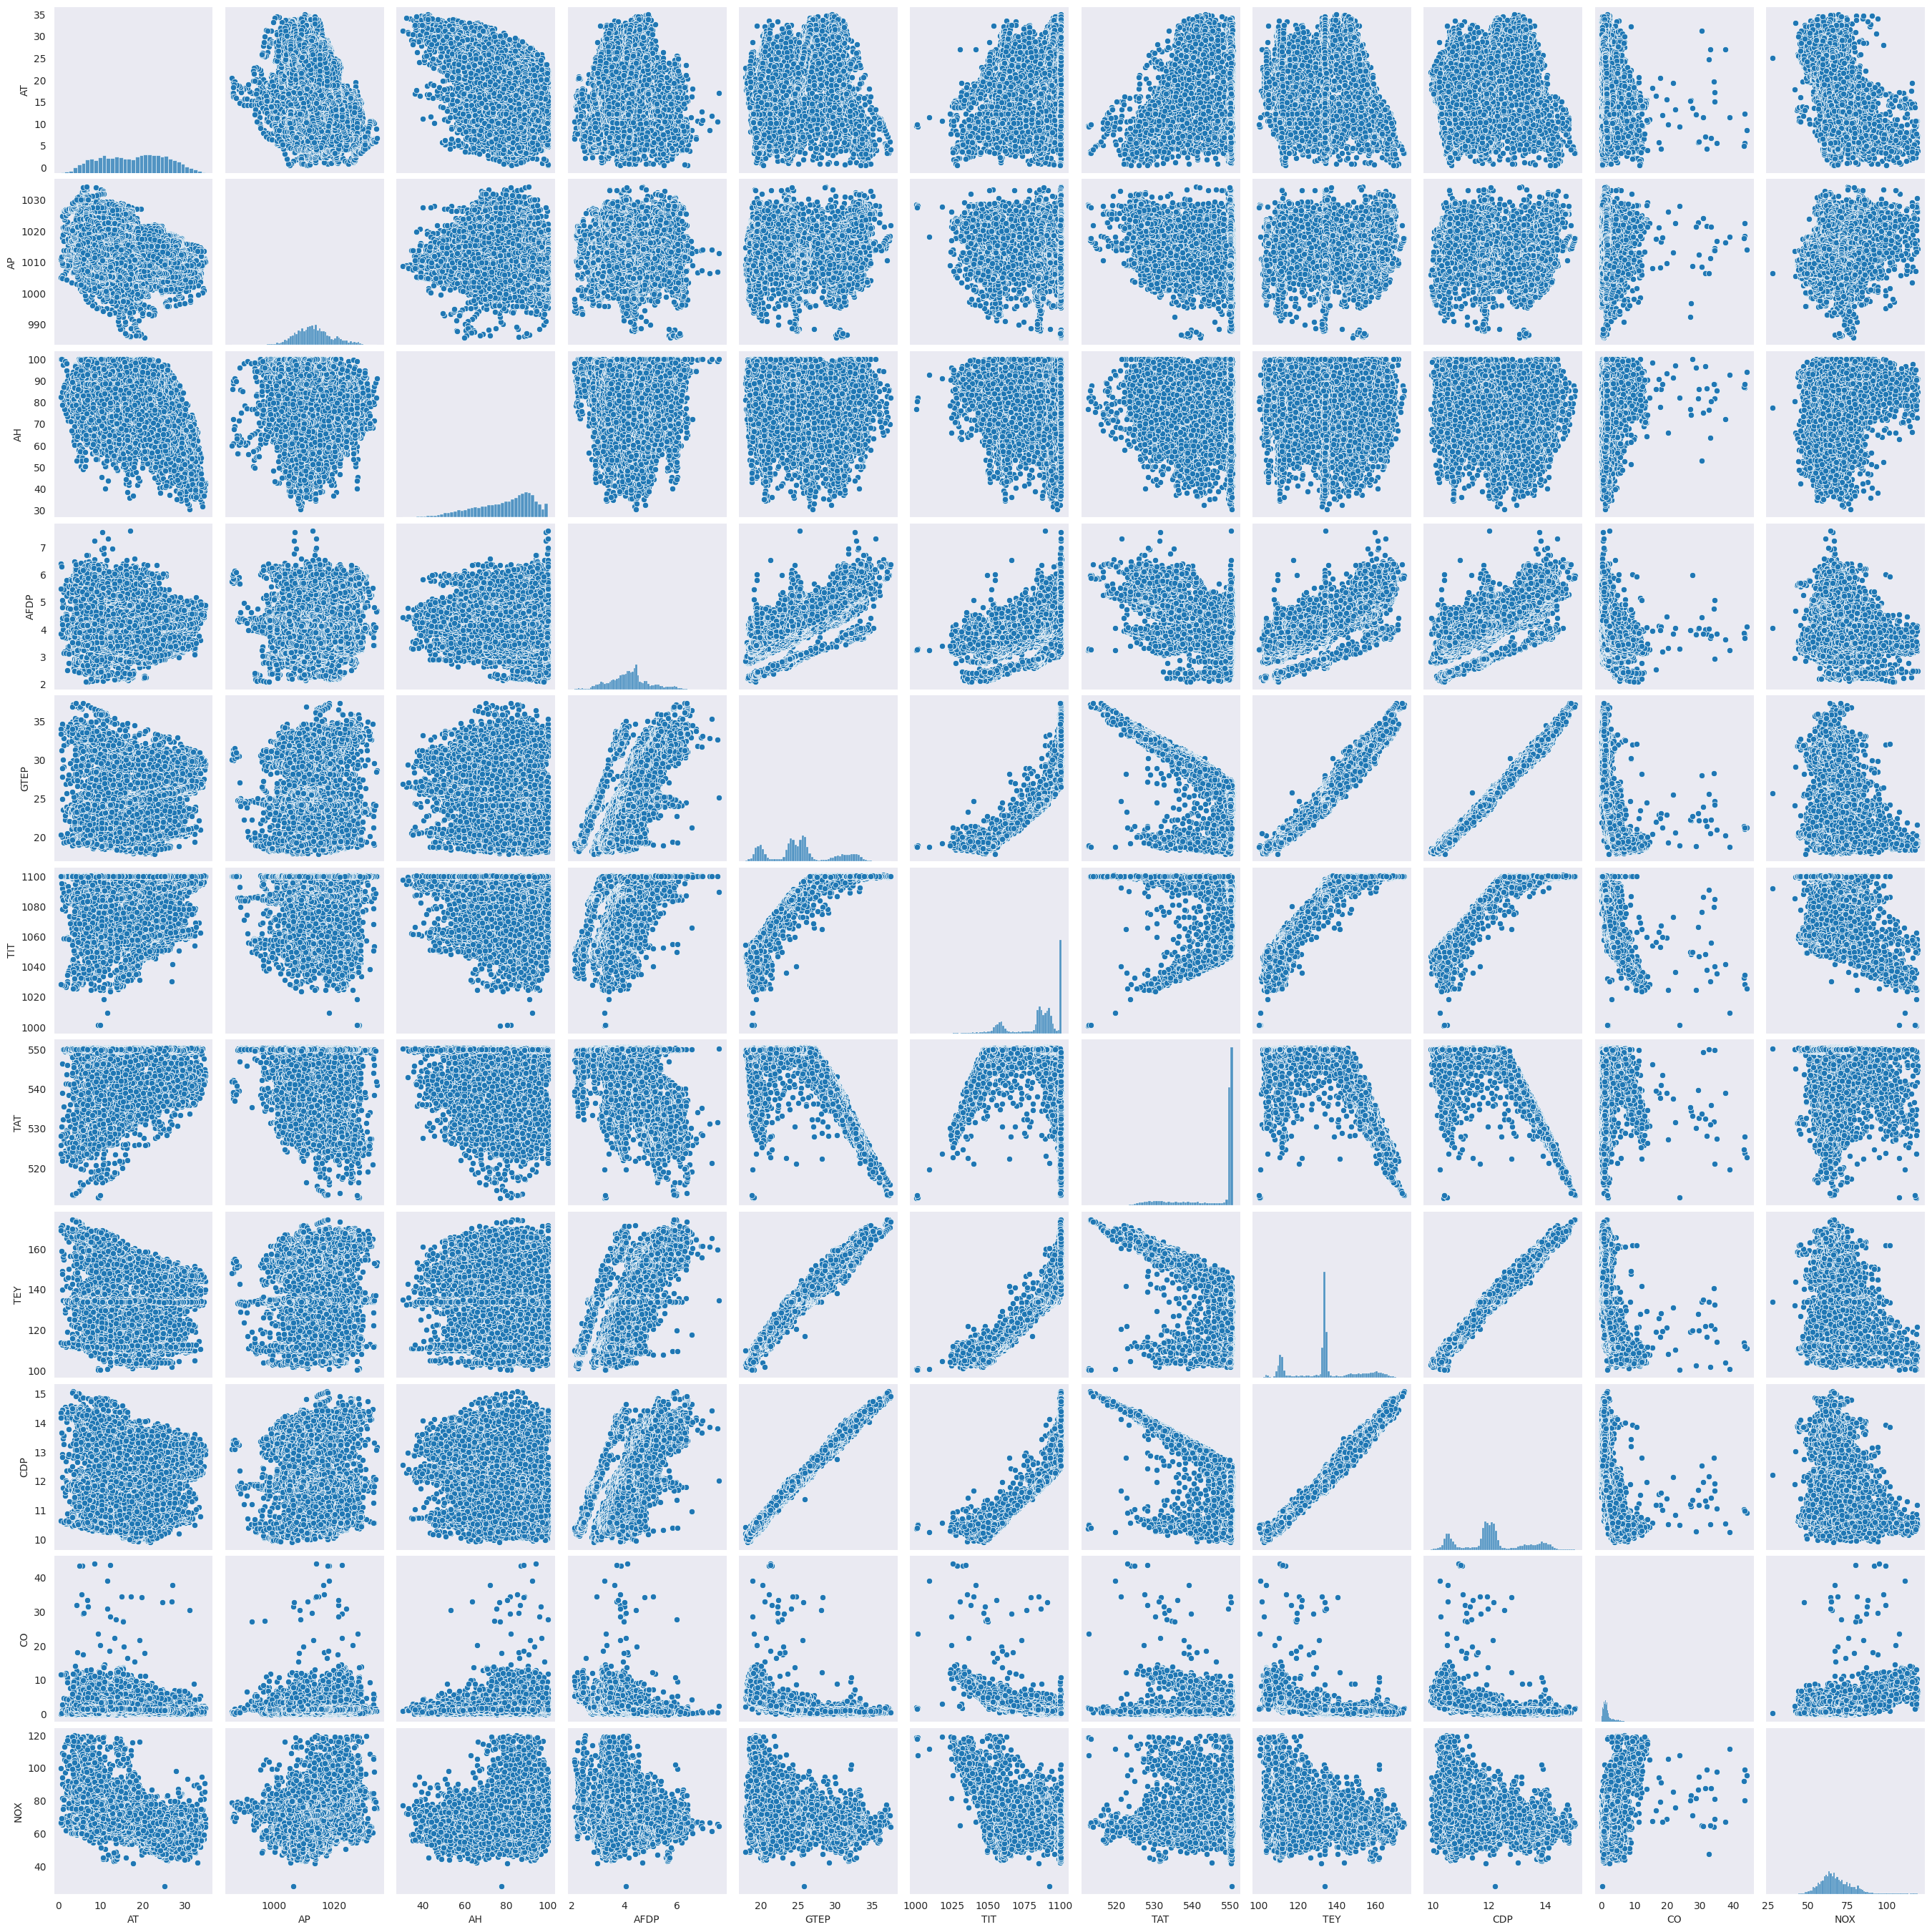

In [105]:
sns.pairplot(df)

<Axes: >

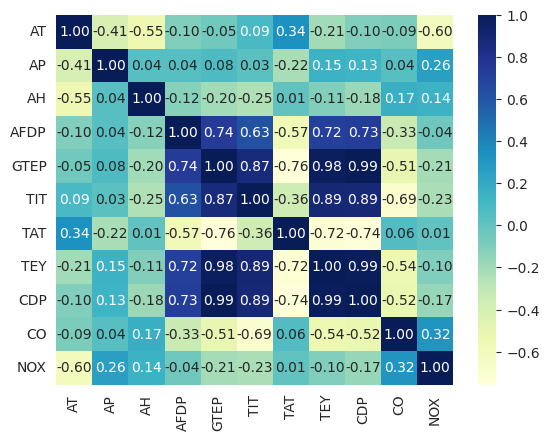

In [106]:
# graph to visualise the correlation data
sns.heatmap(df.corr(),annot=True, fmt=".2f", cmap="YlGnBu")

In [107]:
corr = pd.DataFrame(data = df.corr().iloc[:,7], index=df.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

TEY
TEY   1.000000
CDP   0.988473
GTEP  0.977042
TIT   0.891587
AFDP  0.717995
AP    0.146939
NOX  -0.102631
AH   -0.110272
AT   -0.207495
CO   -0.541751
TAT  -0.720356

<Axes: title={'center': 'Correlation plot between Target variables and independent variables'}, ylabel='TEY'>

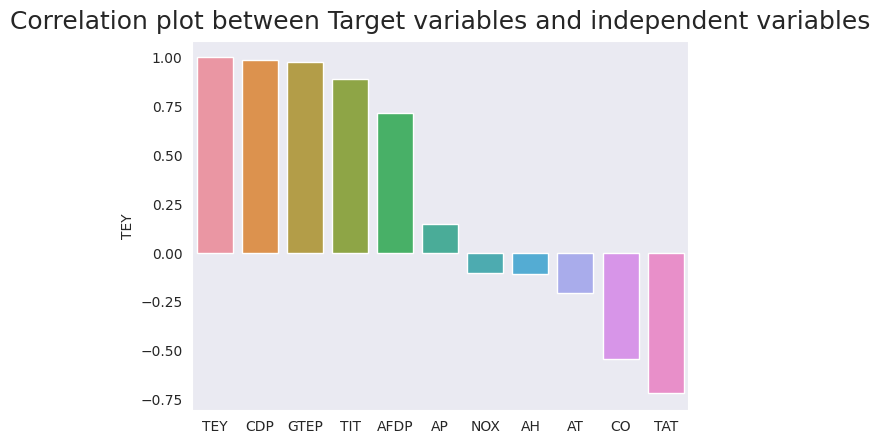

In [108]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=18)
sns.barplot(x = corr.index, y = corr.TEY)


# Splitting data in X and Y

In [109]:
X=df.drop(columns=('TEY'),axis=1)
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [110]:
y = df.iloc[:,7]
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

## Splitting data into train data and test data

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [113]:
x_train.shape

(12031, 10)

In [114]:
y_train.shape

(12031,)

### Building Model

In [115]:
import tensorflow as tf
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(15,input_dim=10,activation='relu'))
model1.add(tf.keras.layers.Dense(10,activation='relu'))
model1.add(tf.keras.layers.Dense(1,activation='linear'))

In [116]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 15)                165       
                                                                 
 dense_16 (Dense)            (None, 10)                160       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 336
Trainable params: 336
Non-trainable params: 0
_________________________________________________________________


In [117]:
model1.metrics_names

[]

## Compile the Model

In [118]:
model1.compile(loss='mse',optimizer='adam',metrics=['mse','mae'])

## Fit the model

In [119]:
history=model1.fit(x_train, y_train, validation_data=(x_test,y_test),epochs =100, batch_size=1000)


Epoch 1/100
13/13 [==============================] - 2s 31ms/step - loss: 7084.9106 - mse: 7084.9106 - mae: 74.5609 - val_loss: 233.0920 - val_mse: 233.0920 - val_mae: 12.8570
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 408.9254 - mse: 408.9254 - mae: 16.7072 - val_loss: 672.2304 - val_mse: 672.2304 - val_mae: 23.2228
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 352.2476 - mse: 352.2476 - mae: 15.4710 - val_loss: 136.2332 - val_mse: 136.2332 - val_mae: 9.1526
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 172.5445 - mse: 172.5445 - mae: 10.7064 - val_loss: 156.7237 - val_mse: 156.7237 - val_mae: 10.1498
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 140.5207 - mse: 140.5207 - mae: 9.3385 - val_loss: 143.8936 - val_mse: 143.8936 - val_mae: 9.6286
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 139.1200 - mse: 139.1200 - mae: 9.3891 - val_loss: 133.1766 - 

In [120]:
scores = model1.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

376/376 [==============================] - 1s 2ms/step - loss: 40.9062 - mse: 40.9062 - mae: 4.7689
mse: 4090.62%


In [121]:
scores

[40.90616226196289, 40.90616226196289, 4.768917083740234]

# Visualize training history

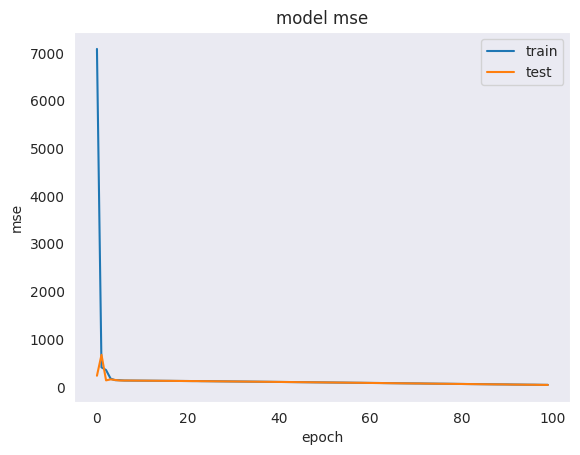

In [122]:
# summarize history for accuracy
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

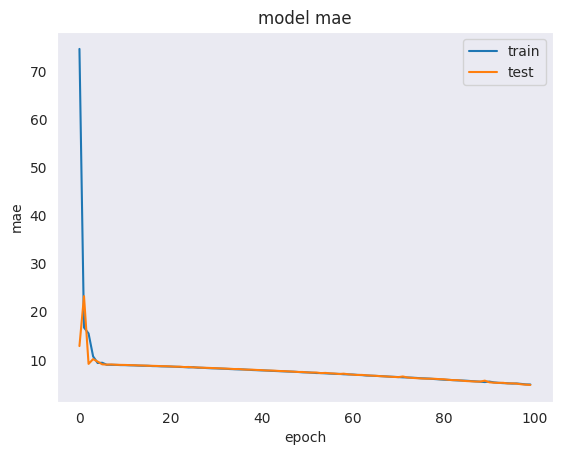

In [123]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

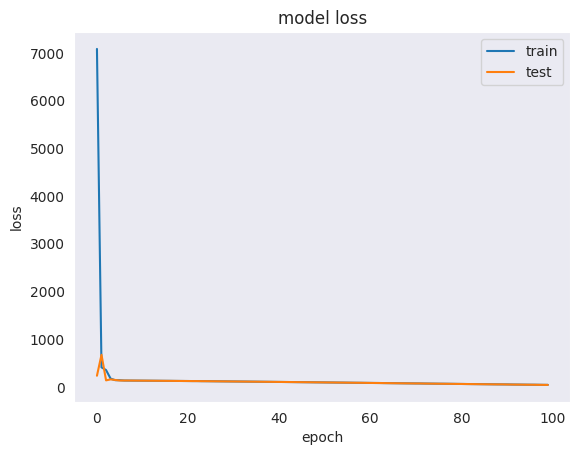

In [124]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [125]:
# evaluate the model

y_train_pred= model1.predict(x_train)
y_test_pred= model1.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

94/94 [==============================] - 0s 2ms/step
Training set rmse: 6.396, Testing set rmse: 6.365


## Hyperparameter Tuning using RandomizedSearchCV

In [126]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

# Building a keras regression model

In [127]:
def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))

    model.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))

    model.add(tf.keras.layers.Dense(1,activation = 'linear'))

    adam = Adam(lr = learning_rate)

    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model

## Wrapping the keras model in a object

In [128]:
keras_reg = KerasRegressor(build_fn = keras_reg_model,verbose = 0)

In [129]:
# Define the search parameters

batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]

activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]


# Create a dictionary of the parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


# Build and fit the RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 10,
                                   random_state=40)
random_result = random_search.fit(x_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


# Summarize the results

In [130]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -3.2244054794311525
Best parameters: {'neuron2': 30, 'neuron1': 10, 'learning_rate': 0.001, 'init': 'normal', 'epochs': 50, 'batch_size': 100, 'activation_function': 'relu'}


### storing the best parameters in a variable
 fitting the model with best parameters

In [131]:
d1= random_result.best_params_

keras_tuned=keras_reg_model(learning_rate=d1['learning_rate'],activation_function=d1['activation_function'],init=d1['init'],
                                                                                       neuron1=d1['neuron1'],neuron2=d1['neuron2'])

# Training and evaluating the model
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =d1['epochs'], batch_size=d1['batch_size'])


Epoch 1/50
121/121 [==============================] - 2s 8ms/step - loss: 4191.2856 - mse: 4191.2861 - mae: 45.9507 - val_loss: 221.0941 - val_mse: 221.0941 - val_mae: 10.7777
Epoch 2/50
121/121 [==============================] - 0s 3ms/step - loss: 219.0560 - mse: 219.0560 - mae: 10.6137 - val_loss: 217.8873 - val_mse: 217.8873 - val_mae: 10.7253
Epoch 3/50
121/121 [==============================] - 0s 3ms/step - loss: 215.5855 - mse: 215.5855 - mae: 10.5894 - val_loss: 215.2109 - val_mse: 215.2109 - val_mae: 11.0062
Epoch 4/50
121/121 [==============================] - 0s 3ms/step - loss: 210.9727 - mse: 210.9727 - mae: 10.5064 - val_loss: 208.5692 - val_mse: 208.5692 - val_mae: 10.4819
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 205.4683 - mse: 205.4683 - mae: 10.3581 - val_loss: 204.6400 - val_mse: 204.6400 - val_mae: 10.7998
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: 199.1547 - mse: 199.1547 - mae: 10.2048 - val_loss: 19

### PLotting Loss(MSE) After Tuning

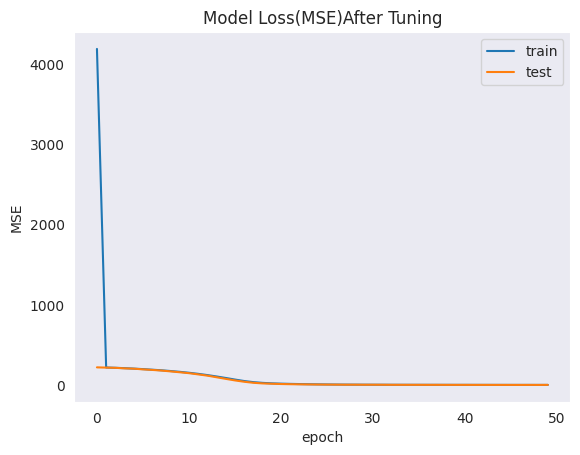

In [132]:
plt.title('Model Loss(MSE)After Tuning')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()

### evaluate the model

In [133]:
y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)

from sklearn.metrics import mean_squared_error

train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)

print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

94/94 [==============================] - 0s 2ms/step
Training set rmse : 1.645, Testing set rmse: 1.617


Comparing base model and tuned model¶

In [134]:
result=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
result

models  train rmse  test rmse
0   base model    6.395793   6.364870
1  tuned model    1.645434   1.617019

# Inference
For both base model and tuned model, the difference between rmse for train and test set is very low indicating almost no overfitting.

For tuned model,the rmse has decreased compared to base model suggesting that hypertuning parameters has increased the efficiency of this regression model.